# Data Wrangling -2

In [20]:
# Import all the neccessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data set of the students from kaggle
## URL (https://www.kaggle.com/datasets/mrsimple07/student-exam-performance-prediction?resource=download)


In [2]:

student_data = pd.read_csv('student_exam_data.csv')
student_data

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


# Apply some numpy and pandas methods to see the data


## Find null values and fix them if any

In [3]:
# convert the data to dataframe
student_labels = ['Study Hours', 'Previous Exam Score', 'Pass/Fail']
df = pd.DataFrame(student_data, columns = student_labels)

In [4]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [5]:
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [6]:
df.size

1500

In [7]:
df.shape

(500, 3)

In [8]:
df.tail()

,Study Hours,Previous Exam Score,Pass/Fail
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1
499,9.875897,66.760346,1


In [9]:
df.isna().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

In [10]:
pd.isnull(df['Study Hours']).sum()


0

# plot the appropriate graph and find outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1674371d910>,
 'caps': [<matplotlib.lines.Line2D at 0x16743780bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1674374af90>],
 'medians': [<matplotlib.lines.Line2D at 0x16743781220>],
 'fliers': [<matplotlib.lines.Line2D at 0x16743781460>],
 'means': []}

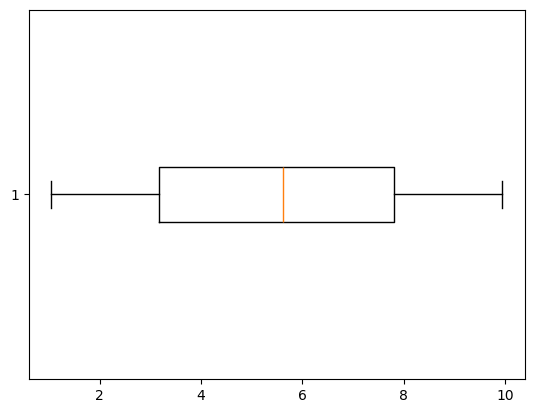

In [11]:
plt.boxplot(df['Study Hours'], vert=False)

In [12]:
# Calculate IQR
Q1 = df['Study Hours'].quantile(0.25)
Q3 = df['Study Hours'].quantile(0.75)
IQR = Q3 - Q1

print('first qunatile', Q1)
print('third qunatile', Q3)
print('IQR', IQR)

first qunatile 3.1715172175
third qunatile 7.80512393375
IQR 4.63360671625


In [13]:
# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Study Hours'] < lower_bound) | (df['Study Hours'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Study Hours, Previous Exam Score, Pass/Fail]
Index: []


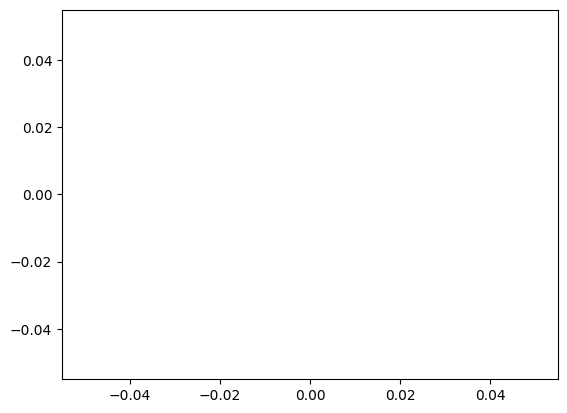

In [14]:
# No outlier found
plt.scatter(outliers['Study Hours'], ([1] * len(outliers)), color='r', label='Outliers')

<Axes: xlabel='Study Hours', ylabel='Count'>

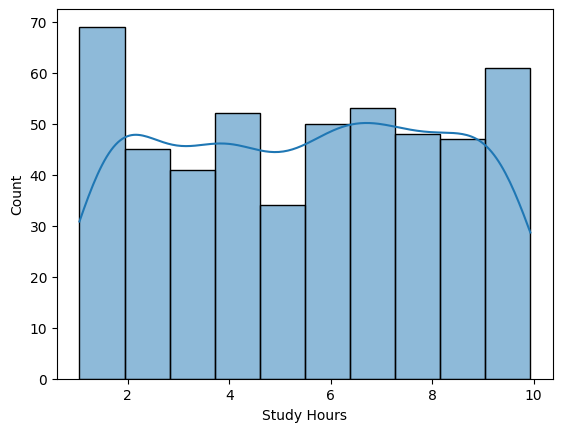

In [15]:
sns.histplot(df['Study Hours'], kde='True')

# divide the data in test and train data using sklearn train_test_split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df['Study Hours']
y = df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### we will normalize it using normaliztion of sklearn StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaler.fit_transform([X_train, y_train])

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.